In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy

In [3]:
def downsample_matrix(matrix):
    # Ensure the matrix is 136x136
    assert matrix.shape == (136, 136), "Input matrix must be 136x136"

    # Sum adjacent rows and columns
    new_matrix = matrix[:68, :68] + matrix[68:, :68] + matrix[:68, 68:] + matrix[68:, 68:]

    return new_matrix

In [48]:
68 * 68

4624

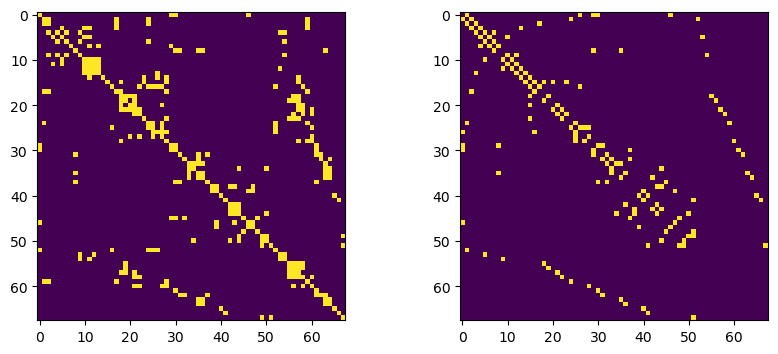

In [4]:
data = scipy.io.loadmat("/Users/yue/Desktop/analysis/tmp/matrix_data.mat")

# Extract the matrix (MATLAB saves it as a dictionary)
A = data['A']

a_hat_l_ = np.load("ramp/cyberattck9_ramp_9_1_agc_a_hat_l_1-68_variable_0.npy")

# Ensure the shape is (136, 136)
assert a_hat_l_.shape == (136, 136), "Matrix must be 136x136"

# Downsample by summing every 2x2 block
downsampled_matrix = downsample_matrix(a_hat_l_)

# Plot the downsampled matrix
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].imshow((downsampled_matrix > 0.3) * 1, cmap="viridis", interpolation="nearest")
ax[1].imshow(A)

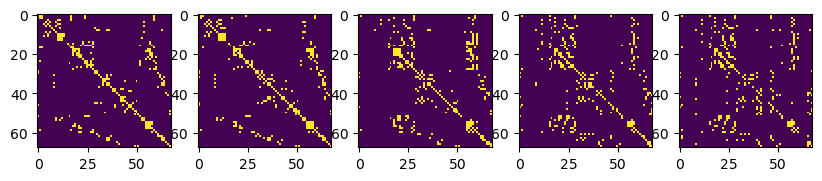

In [5]:
fig, ax = plt.subplots(1, 5, figsize=(10, 2))

for i in range(5):

    a_hat_l_ = np.load("ramp/cyberattck9_ramp_9_1_agc_a_hat_l_1-68_variable_" + str(i) + ".npy")

    # Ensure the shape is (136, 136)
    assert a_hat_l_.shape == (136, 136), "Matrix must be 136x136"

    # Downsample by summing every 2x2 block
    downsampled_matrix = downsample_matrix(a_hat_l_)
    flat_arr = downsampled_matrix.flatten()
    # Plot the downsampled matrix
    thresh = np.partition(flat_arr, -300)[-300]
    ax[i].imshow((downsampled_matrix > thresh) * 1, cmap="viridis", interpolation="nearest")

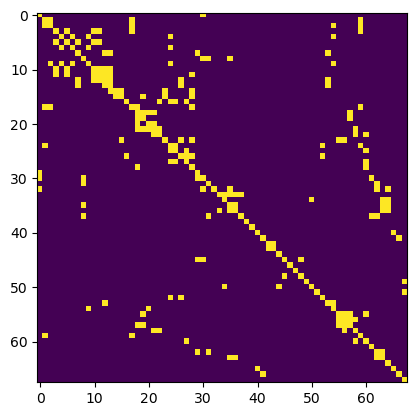

In [6]:
a_hat_l_ = np.load("/Users/yue/Desktop/analysis/tmp/a_hat_l_.npy")
dm = downsample_matrix(a_hat_l_)
plt.imshow((dm > 0.3) * 1)

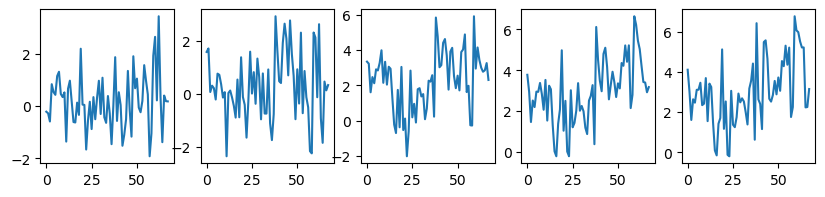

In [51]:
fig, ax = plt.subplots(1, 5, figsize=(10, 2))

ll = []

base = np.load('/Users/yue/Desktop/analysis/tmp/no_norm_relu_a_hat_l_.npy')
base_ = downsample_matrix(base)

for i in range(5):

    a_hat_l_ = np.load("ramp/cyberattck9_ramp_9_1_agc_a_hat_l_1-68_variable_" + str(i) + ".npy")

    # Ensure the shape is (136, 136)
    assert a_hat_l_.shape == (136, 136), "Matrix must be 136x136"

    # Downsample by summing every 2x2 block
    downsampled_matrix = downsample_matrix(a_hat_l_)

    # Plot the downsampled matrix
    l = np.sum((dm - (downsampled_matrix)), axis=0)
    ll.append(l[8])
    ax[i].plot(l)
    

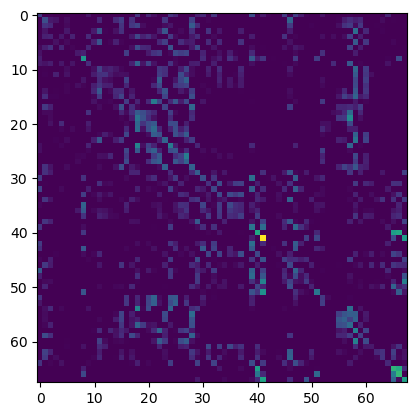

In [54]:
plt.imshow(downsampled_matrix)

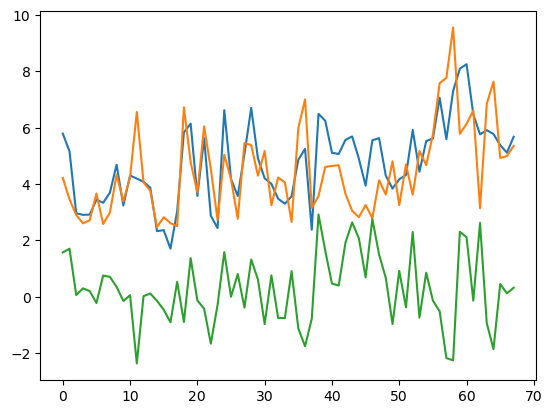

In [48]:
a_hat_l_ = np.load("ramp/cyberattck9_ramp_9_1_agc_a_hat_l_1-68_variable_1.npy")
downsampled_matrix = downsample_matrix(a_hat_l_)

a = (dm)
b = (downsampled_matrix)

diff = np.abs(a - b)

plt.plot(np.sum(a, axis=0))
plt.plot(np.sum(b, axis=0))
plt.plot(np.sum(a-b, axis = 0))

# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].plot(np.sum(a, axis=0))
# ax[1].plot(np.sum(b, axis=0))

In [45]:
a_hat_l_.min()

0.00010616332

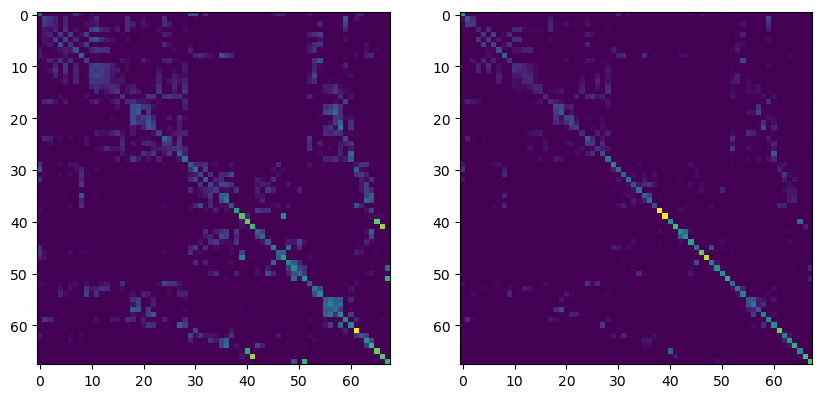

In [25]:
def reg(image):
    mean = np.mean(image)
    std = np.std(image)

    standardized_image = (image - mean) / std
    return standardized_image

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(reg(downsampled_matrix))
ax[1].imshow(reg(dm))

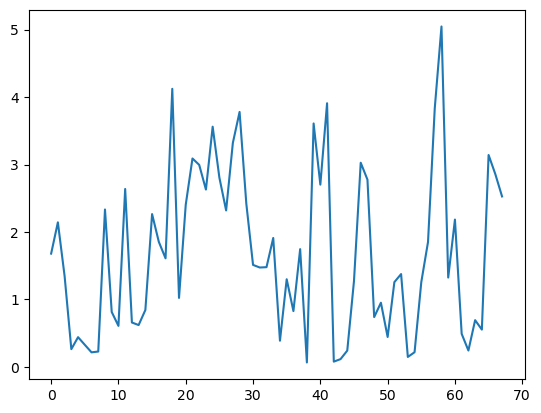

In [28]:
plt.plot(np.sum(downsampled_matrix, axis = 0))

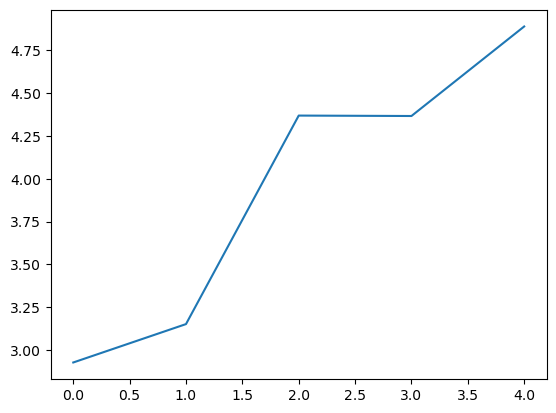

In [57]:
plt.plot(ll)

[3.4371512, 3.89603, 5.4092603, 4.74547, 5.1049385]


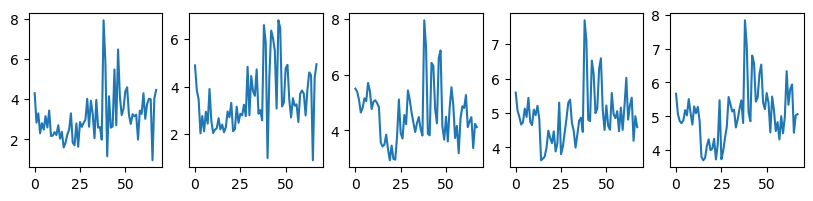

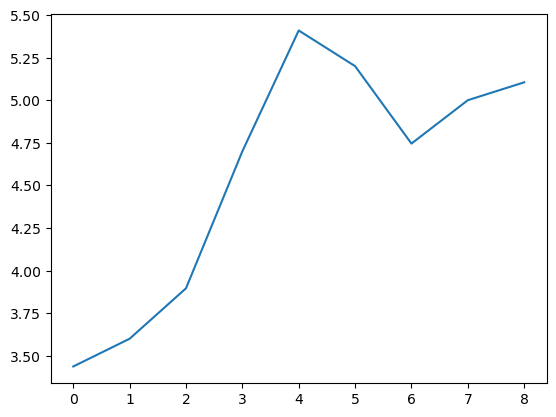

In [64]:
fig, ax = plt.subplots(1, 5, figsize=(10, 2))

ll = []

for i in range(5):

    a_hat_l_ = np.load("ramp/cyberattck9_ramp_9_1_agc_a_hat_l_1-68_variable_" + str(i) + ".npy")

    # Ensure the shape is (136, 136)
    assert a_hat_l_.shape == (136, 136), "Matrix must be 136x136"

    # Downsample by summing every 2x2 block
    downsampled_matrix = downsample_matrix(a_hat_l_)

    # Plot the downsampled matrix
    l = np.sum(np.abs(dm - downsampled_matrix), axis=1)
    ll.append(l[8])
    ax[i].plot(l)
print(ll)    

ll = [3.4371512, 3.6, 3.89603, 4.7, 5.4092603, 5.2, 4.74547, 5.0, 5.1049385]

plt.figure()
plt.plot(ll)

[6.4349833, 5.702626, 3.2104921, 4.1901383, 5.146812]


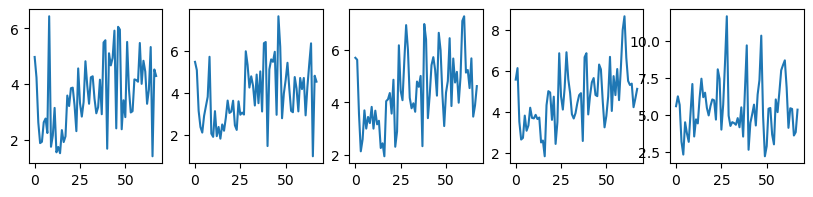

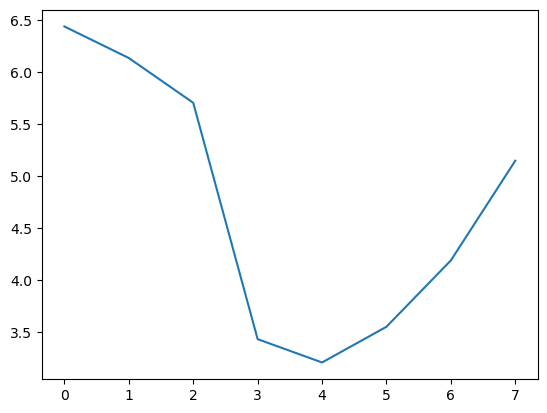

In [58]:
fig, ax = plt.subplots(1, 5, figsize=(10, 2))

ll = []

for i in range(5):

    a_hat_l_ = np.load("Trapezoid/cyberattck9_Trapezoid_9_1_agc_a_hat_l_1-68_variable_" + str(i) + ".npy")

    # Ensure the shape is (136, 136)
    assert a_hat_l_.shape == (136, 136), "Matrix must be 136x136"

    # Downsample by summing every 2x2 block
    downsampled_matrix = downsample_matrix(a_hat_l_)

    # Plot the downsampled matrix
    l = np.sum(np.abs(dm - downsampled_matrix), axis=0)
    ll.append(l[8])
    ax[i].plot(l)

print (ll)

ll = [6.4349833, 6.13231, 5.702626, 3.4344, 3.2104921, 3.55334, 4.1901383,  5.146812]

plt.figure()
plt.plot(ll)

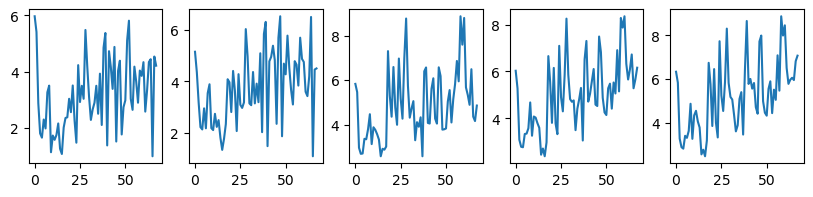

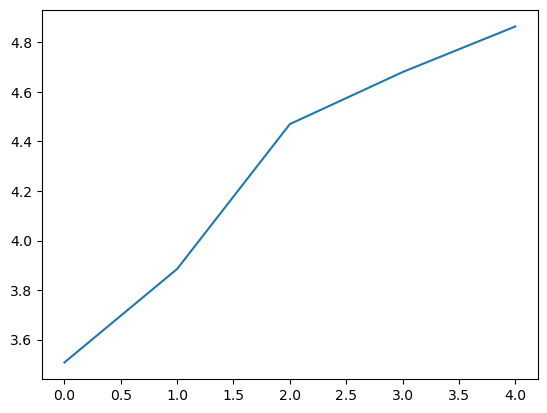

In [52]:
fig, ax = plt.subplots(1, 5, figsize=(10, 2))

ll = []

for i in range(5):

    a_hat_l_ = np.load("step/cyberattck9_step_9_1_agc_a_hat_l_1-68_variable_" + str(i) + ".npy")

    # Ensure the shape is (136, 136)
    assert a_hat_l_.shape == (136, 136), "Matrix must be 136x136"

    # Downsample by summing every 2x2 block
    downsampled_matrix = downsample_matrix(a_hat_l_)

    # Plot the downsampled matrix
    l = np.sum(np.abs(dm - downsampled_matrix), axis=0)
    ll.append(l[8])
    ax[i].plot(l)

plt.figure()
plt.plot(ll)

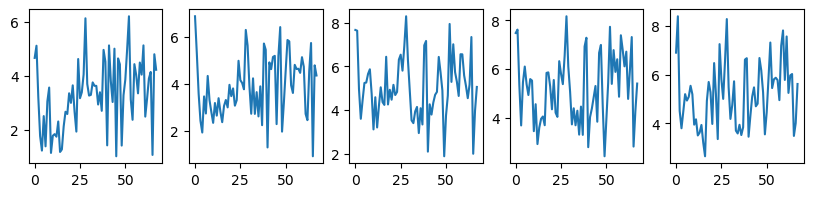

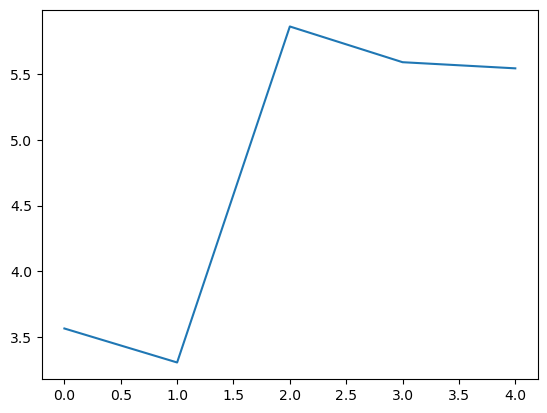

In [55]:
fig, ax = plt.subplots(1, 5, figsize=(10, 2))

ll = []

for i in range(5):

    a_hat_l_ = np.load("poison/cyberattck9_poison_9_1_agc_a_hat_l_1-68_variable_" + str(i) + ".npy")

    # Ensure the shape is (136, 136)
    assert a_hat_l_.shape == (136, 136), "Matrix must be 136x136"

    # Downsample by summing every 2x2 block
    downsampled_matrix = downsample_matrix(a_hat_l_)

    # Plot the downsampled matrix
    l = np.sum(np.abs(dm - downsampled_matrix), axis=0)
    ll.append(l[8])
    ax[i].plot(l)

plt.figure()
plt.plot(ll)